# Google analytics API reporting

In [1]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#set the seed - numpy
np.random.seed(1)

#style sheet - matplotlib.pyplot
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 80
plt.style.use('seaborn-darkgrid')

#context (style) - seaborn
sns.set_context("notebook")

## Fetch data from Google Analytics

In [2]:
SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'client_secrets.json'
VIEW_ID = '184870423'

In [3]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(KEY_FILE_LOCATION, SCOPES)

# Build the service object.
analytics = build('analyticsreporting', 'v4', credentials=credentials)

In [53]:
# Fetch the response from GA
response = analytics.reports().batchGet(
  body={
    'reportRequests': [
    {
      'viewId': VIEW_ID,
      'dateRanges': [{'startDate': '60daysAgo', 'endDate': 'today'}],
      "metrics": [
        {"expression": "ga:pageviews"}, 
        {"expression": "ga:sessions"}, 
        {"expression": "ga:sessionDuration"}, 
        {"expression": "ga:avgSessionDuration"}
      ],
      'dimensions': [{"name": "ga:pagePath"}, {'name': 'ga:date'}, {"name": "ga:sourceMedium"}]
    }]
  }
).execute()

In [54]:
columns = ['ga:pagePath', 'ga:sourceMedium', 'ga:date', 'ga:pageviews', 'ga:sessions', 'ga:sessionDuration', 'ga:avgSessionDuration']
df = pd.DataFrame()


for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    row_dict = {}

    for row in report.get('data', {}).get('rows', []):
        dimensions = row.get('dimensions', [])
        dateRangeValues = row.get('metrics', [])

        # Enumerate over dimensions
        for header, dimension in zip(dimensionHeaders, dimensions):
            if header in columns:
                row_dict[header] = dimension


        # Enumerate over the values
        for i, values in enumerate(dateRangeValues):
            for metricHeader, value in zip(metricHeaders, values.get('values')):
                header = metricHeader.get('name')

                if header in columns:
                    row_dict[header] = value


        print(row_dict)
        df = df.append(row_dict, ignore_index=True)

# This dataframe can be reused afterwards.
df.to_csv('out.csv', index=False)

{'ga:pagePath': '/', 'ga:date': '20200313', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '6', 'ga:sessions': '1', 'ga:sessionDuration': '13.0', 'ga:avgSessionDuration': '13.0'}
{'ga:pagePath': '/', 'ga:date': '20200313', 'ga:sourceMedium': 'test8 / test8', 'ga:pageviews': '3', 'ga:sessions': '1', 'ga:sessionDuration': '3.0', 'ga:avgSessionDuration': '3.0'}
{'ga:pagePath': '/', 'ga:date': '20200316', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/', 'ga:date': '20200316', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/', 'ga:date': '20200316', 'ga:sourceMedium': 'test8 / test8', 'ga:pageviews': '2', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/', 'ga:date': '20200317', 'ga:sourceMedium': '(

{'ga:pagePath': '/', 'ga:date': '20200429', 'ga:sourceMedium': 'linkedin.com / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/', 'ga:date': '20200430', 'ga:sourceMedium': '(direct) / (none)', 'ga:pageviews': '2', 'ga:sessions': '1', 'ga:sessionDuration': '147.0', 'ga:avgSessionDuration': '147.0'}
{'ga:pagePath': '/', 'ga:date': '20200430', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '2', 'ga:sessions': '2', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/', 'ga:date': '20200430', 'ga:sourceMedium': 'l.facebook.com / referral', 'ga:pageviews': '5', 'ga:sessions': '1', 'ga:sessionDuration': '4.0', 'ga:avgSessionDuration': '4.0'}
{'ga:pagePath': '/', 'ga:date': '20200501', 'ga:sourceMedium': 't.co / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '7.0', 'ga:avgSessionDuration': '7.0'}
{'ga:pagePath': '/', 'ga:date': '20200502', 'ga:sourceM

{'ga:pagePath': '/?page_id=4773&preview=true', 'ga:date': '20200430', 'ga:sourceMedium': 'l.facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/?ref=hexometer', 'ga:date': '20200419', 'ga:sourceMedium': '(direct) / (none)', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/?ref=hexometer', 'ga:date': '20200427', 'ga:sourceMedium': 'hexometer.com / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/?w3tc_note=flush_all', 'ga:date': '20200407', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/about/', 'ga:date': '20200319', 'ga:sourceMedium': '(direct) / (none)', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', '

{'ga:pagePath': '/branch-inventory-management/?fbclid=IwAR0OIbCHneUqs113hEP9lXxOXruzO1x0xXIp-8QNHF6kWSi7jJyMkf95DYM', 'ga:date': '20200318', 'ga:sourceMedium': 'facebook / paid', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/branch-inventory-management/?fbclid=IwAR0rtkAi1ZF5SloXtMzJDRvND7siX7rHKfW5b09W6AJCYINLcQiDjRyF3MU', 'ga:date': '20200329', 'ga:sourceMedium': 'm.facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/branch-inventory-management/?fbclid=IwAR0WxT_bXTTgilEFJEEk8ApCCewjTAELLqxxyVt9qetGPZmMFZ0myL4Zt3c', 'ga:date': '20200318', 'ga:sourceMedium': 'facebook / paid', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/branch-inventory-management/?fbclid=IwAR0xtgPpDVCwXVBbIK-EpH3Y7h1V7qziQ-Jy6xB0_6u9T1evq9UXf1nhtJ8', 'ga:date': '20200318', 'ga:so

{'ga:pagePath': '/contact-us/', 'ga:date': '20200403', 'ga:sourceMedium': 'l.facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/contact-us/', 'ga:date': '20200404', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '5', 'ga:sessions': '3', 'ga:sessionDuration': '182.0', 'ga:avgSessionDuration': '60.666666666666664'}
{'ga:pagePath': '/contact-us/', 'ga:date': '20200405', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '8.0', 'ga:avgSessionDuration': '8.0'}
{'ga:pagePath': '/contact-us/', 'ga:date': '20200407', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '5', 'ga:sessions': '1', 'ga:sessionDuration': '92.0', 'ga:avgSessionDuration': '92.0'}
{'ga:pagePath': '/contact-us/', 'ga:date': '20200414', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDur

{'ga:pagePath': '/en-blog/', 'ga:date': '20200313', 'ga:sourceMedium': 'test8 / test8', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/en-blog/', 'ga:date': '20200316', 'ga:sourceMedium': 'test8 / test8', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/en-blog/', 'ga:date': '20200319', 'ga:sourceMedium': 'email / email', 'ga:pageviews': '3', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/en-blog/', 'ga:date': '20200321', 'ga:sourceMedium': 'l.facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/en-blog/', 'ga:date': '20200322', 'ga:sourceMedium': 'l.facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/en-blog/

{'ga:pagePath': '/hr/ https:/exact-byte.com/hr/covid-19-vizualizacija/', 'ga:date': '20200327', 'ga:sourceMedium': 'google / organic', 'ga:pageviews': '2', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/?p=3591', 'ga:date': '20200319', 'ga:sourceMedium': 'email / email', 'ga:pageviews': '4', 'ga:sessions': '2', 'ga:sessionDuration': '2573.0', 'ga:avgSessionDuration': '1286.5'}
{'ga:pagePath': '/hr/?p=3591&_thumbnail_id=3457', 'ga:date': '20200319', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '456.0', 'ga:avgSessionDuration': '456.0'}
{'ga:pagePath': '/hr/?p=3591&preview=true&_thumbnail_id=3457', 'ga:date': '20200319', 'ga:sourceMedium': 'email / email', 'ga:pageviews': '2', 'ga:sessions': '0', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/?p=3591&preview=true&_thumbnail_id=3457', 'ga:date': '20200319', 'ga:sourceMedium': 'facebook.c

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR08MyraXDRp7N0fLWULLEF1-Tbi-e0eswrWKT__FVP3toCb0niTmR20Zgs', 'ga:date': '20200508', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR09RD-auIHyW9qofc4DJ0__X_gP7apRNIha1btO5-pZcelLjdM1y6EbSBM', 'ga:date': '20200507', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR0A5zyQ6-x2Pe1iaQ5WMXlo_9SoH75sN_xPDLHlSjKS7i6XE9BrKi2cJgY', 'ga:date': '20200502', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR0TnaPaZEOaio3xsH9hGs05vjTNenRzt-9Tp22_3qLytancxckUYDX2sdw', 'ga:date': '20200508', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR0tPB4HjVLj7iY2uLe96bTxWf_WSPHjIsz-7WbJ-H6-v1JDXe0xDyq97yA', 'ga:date': '20200505', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR0tpcc47pD8iYUBtAMP_xi0UcxvQsHZjOjClggG7OoiqFo5SiaxagHzh8A', 'ga:date': '20200506', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR1J6ZLH4bVWgXLKP3N0UJ58XDAjNwzpAXsrlo3e0uBtRZ1tYeywXgVqW_I', 'ga:date': '20200503', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR1jjDMLhsisWDVFT6D88Py4WEESSCz7syBQjrTGHB6IXDZEHCXH6LqhNEA', 'ga:date': '20200507', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR1JYl5asS0VrOBw1nl6LVMJXmlyzyFj-KdLvC43V-1fYZDd-MFbptOV2Kg', 'ga:date': '20200508', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR21m6ZwoX_iaRhTYmUPKiDhT6hLl8M43bKXkWR3fGTTrk7tcARIsQd2lMs', 'ga:date': '20200506', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR21QJDHkijeAipVSYV23MohI-ruxL7W5Z7b9vZYaRdYDfl2Q6KAKpxom-Q', 'ga:date': '20200508', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR22bQ2oWLOXGBI_0XvUZX70l4sz5pT7Mn-o5ElTRGM15OF8Ybbkvmn-nQo', 'ga:date': '20200506', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR2v3LWDrGrWMvb0dQojQLG1BMtya7VPe7FatVhxwmWyyuibJnFu-qA_0KY', 'ga:date': '20200509', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR2voc6wLkrJ8BO3EwwAGgIXAr1E0IkGAQuz9WjpE9vsuPs8nw4iLl6W_RU', 'ga:date': '20200507', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR2VOHGvIffSfulZ6BizjMLtF659kV8c2VTL87fEdjWG_5C8ayqMNFrYxSg', 'ga:date': '20200506', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR3mkUCx4DaGS9NkGUCrKhlB--XiSUWgeveNTaJZa-fzOLoa8mkC_3pnJ2Q', 'ga:date': '20200504', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR3mrQugoIbN46hu--KROVTdLON417NPAUsGU8KiawGnPOT2RUPaTbDtwBk', 'ga:date': '20200501', 'ga:sourceMedium': 'facebook.com / referral', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavanja-razlicitih-kanala/?fbclid=IwAR3MRwUmTW21aaGzRFu2jbEIXYi2TkBuG-Tf_Cy79zEj51VBiAh77hJ6d0o', 'ga:date': '20200503', 'ga:sourceMedium': 'fb / analytics_analysis', 'ga:pageviews': '1', 'ga:sessions': '1', 'ga:sessionDuration': '0.0', 'ga:avgSessionDuration': '0.0'}
{'ga:pagePath': '/hr/analiza-vizualizacija-oglasavan

In [55]:
df

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium
0,13.0,20200313,/,6,13.0,1,facebook.com / referral
1,3.0,20200313,/,3,3.0,1,test8 / test8
2,0.0,20200316,/,1,0.0,0,facebook.com / referral
3,0.0,20200316,/,1,0.0,0,google / organic
4,0.0,20200316,/,2,0.0,1,test8 / test8
...,...,...,...,...,...,...,...
995,0.0,20200503,/hr/analiza-vizualizacija-oglasavanja-razlicit...,1,0.0,1,fb / analytics_analysis
996,0.0,20200506,/hr/analiza-vizualizacija-oglasavanja-razlicit...,1,0.0,1,fb / analytics_analysis
997,0.0,20200508,/hr/analiza-vizualizacija-oglasavanja-razlicit...,1,0.0,1,fb / analytics_analysis
998,0.0,20200505,/hr/analiza-vizualizacija-oglasavanja-razlicit...,1,0.0,1,fb / analytics_analysis


## Manipulate data frame

In [7]:
df['ga:sourceMedium'].unique()

array(['cosmo / cosmo', 'facebook.com / referral', 'google / organic',
       'hk.linkedin.com / referral', '(direct) / (none)',
       'l.facebook.com / referral', 'youtube.com / referral',
       'lm.facebook.com / referral', 'linkedin.com / referral',
       'bing / organic', 't.co / referral', 'commentag.com / referral',
       'fb / image_broad', 'hexometer.com / referral',
       'm.facebook.com / referral', 'fb / image_broad_landing',
       'alenn.ai / referral', 'duckduckgo / organic',
       'fb / analytics_analysis', 'fb / post', 'google / cpc',
       'github.com / referral', 'facebook / paid_traffic',
       'fb / single_image', 'ad-review-tool.twitter.biz / referral',
       'fb / video', 'lnkd.in / referral', 's3.amazonaws.com / referral'],
      dtype=object)

In [8]:
@interact
def filter_sources(source=['cosmo / cosmo', 'facebook.com / referral', 'google / organic',
       'hk.linkedin.com / referral', '(direct) / (none)',
       'l.facebook.com / referral', 'youtube.com / referral',
       'lm.facebook.com / referral', 'linkedin.com / referral',
       'bing / organic', 't.co / referral', 'commentag.com / referral',
       'fb / image_broad', 'hexometer.com / referral',
       'm.facebook.com / referral', 'fb / image_broad_landing',
       'alenn.ai / referral', 'duckduckgo / organic',
       'fb / analytics_analysis', 'fb / post', 'google / cpc',
       'github.com / referral', 'facebook / paid_traffic',
       'fb / single_image', 'ad-review-tool.twitter.biz / referral',
       'fb / video', 'lnkd.in / referral', 's3.amazonaws.com / referral']):
    return df[df['ga:sourceMedium'] == source]


interactive(children=(Dropdown(description='source', options=('cosmo / cosmo', 'facebook.com / referral', 'goo…

In [9]:
df.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium
0,120.0,20200414,/,3,120.0,1,cosmo / cosmo
1,14.666666666666666,20200414,/,4,44.0,3,facebook.com / referral
2,7.0,20200415,/,1,7.0,1,facebook.com / referral
3,29.0,20200416,/,1,29.0,1,cosmo / cosmo
4,0.0,20200416,/,1,0.0,1,facebook.com / referral


In [10]:
df['date'] = df['ga:date'].apply(lambda s: pd.to_datetime(s).date())
df['day_in_year'] = df['date'].apply(lambda s: s.timetuple().tm_yday)

df['avg_session_duration'] = df['ga:avgSessionDuration'].astype(float)
df['sessions'] = df['ga:sessions'].astype(int)
df['pageviews'] = df['ga:pageviews'].astype(int)

In [11]:
df.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
0,120.0,20200414,/,3,120.0,1,cosmo / cosmo,2020-04-14,105,120.000000,1,3
1,14.666666666666666,20200414,/,4,44.0,3,facebook.com / referral,2020-04-14,105,14.666667,3,4
2,7.0,20200415,/,1,7.0,1,facebook.com / referral,2020-04-15,106,7.000000,1,1
3,29.0,20200416,/,1,29.0,1,cosmo / cosmo,2020-04-16,107,29.000000,1,1
4,0.0,20200416,/,1,0.0,1,facebook.com / referral,2020-04-16,107,0.000000,1,1


In [39]:
df = df[df['ga:pagePath'].str.contains('mini') | df['ga:pagePath'].str.contains('razvoj-tehnologija-za-autonomno-vozilo')]
df.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
866,0.0,20200416,/hr/mini-tesla-autonomna-voznja-prvi-dio-na-rpi/,1,0.0,0,cosmo / cosmo,2020-04-16,107,0.0,0,1
867,0.0,20200416,/hr/mini-tesla-autonomna-voznja-prvi-dio-na-rpi/,1,0.0,0,google / organic,2020-04-16,107,0.0,0,1
868,0.0,20200416,/hr/mini-tesla-autonomna-voznja-prvi-dio-na-rp...,1,0.0,0,google / organic,2020-04-16,107,0.0,0,1
869,0.0,20200416,/hr/mini-tesla-autonomni-autic/,1,0.0,0,cosmo / cosmo,2020-04-16,107,0.0,0,1
870,477.0,20200416,/hr/mini-tesla-autonomni-autic/,3,477.0,1,google / organic,2020-04-16,107,477.0,1,3


## Facebook video

In [13]:
df_facebook_video = df[df['ga:sourceMedium'] == 'fb / video']
df_facebook_video.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
875,0.0,20200417,/hr/mini-tesla-autonomni-autic/,1,0.0,1,fb / video,2020-04-17,108,0.000000,1,1
883,0.0,20200418,/hr/mini-tesla-autonomni-autic/,1,0.0,1,fb / video,2020-04-18,109,0.000000,1,1
893,25.666666666666668,20200419,/hr/mini-tesla-autonomni-autic/,4,77.0,3,fb / video,2020-04-19,110,25.666667,3,4
917,0.0,20200423,/hr/mini-tesla-autonomni-autic/,3,0.0,3,fb / video,2020-04-23,114,0.000000,3,3
924,0.0,20200424,/hr/mini-tesla-autonomni-autic/,2,0.0,2,fb / video,2020-04-24,115,0.000000,2,2


## Facebook

In [14]:
df_facebook_post = df[(df['ga:sourceMedium'] == 'fb / post' ) | (df['ga:sourceMedium'] == 'facebook / paid_traffic') | (df['ga:sourceMedium'] == 'fb / single_image')]
df_facebook_post.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
874,1.0689655172413792,20200417,/hr/mini-tesla-autonomni-autic/,31,31.0,29,fb / post,2020-04-17,108,1.068966,29,31
882,0.8863636363636364,20200418,/hr/mini-tesla-autonomni-autic/,46,39.0,44,fb / post,2020-04-18,109,0.886364,44,46
892,0.0,20200419,/hr/mini-tesla-autonomni-autic/,51,0.0,51,fb / post,2020-04-19,110,0.000000,51,51
901,0.0,20200420,/hr/mini-tesla-autonomni-autic/,13,0.0,13,fb / post,2020-04-20,111,0.000000,13,13
907,0.0,20200421,/hr/mini-tesla-autonomni-autic/,5,0.0,5,fb / post,2020-04-21,112,0.000000,5,5


## Google

In [15]:
df_google = df[df['ga:sourceMedium'] == 'google / cpc']
df_google.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
884,0.0,20200418,/hr/mini-tesla-autonomni-autic/,9,0.0,9,google / cpc,2020-04-18,109,0.000000,9,9
894,4.0,20200419,/hr/mini-tesla-autonomni-autic/,9,32.0,8,google / cpc,2020-04-19,110,4.000000,8,9
902,0.2222222222222222,20200420,/hr/mini-tesla-autonomni-autic/,10,2.0,9,google / cpc,2020-04-20,111,0.222222,9,10
908,0.0,20200421,/hr/mini-tesla-autonomni-autic/,5,0.0,5,google / cpc,2020-04-21,112,0.000000,5,5
912,2.6,20200422,/hr/mini-tesla-autonomni-autic/,5,13.0,5,google / cpc,2020-04-22,113,2.600000,5,5


## LinkedIn

In [16]:
df_linkedin = df[(df['ga:sourceMedium'] == 'linkedin.com / referral') | (df['ga:sourceMedium'] == 'lnkd.in / referral')]
df_linkedin.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
878,29.75,20200417,/hr/mini-tesla-autonomni-autic/,4,119.0,4,linkedin.com / referral,2020-04-17,108,29.75,4,4
885,10.8,20200418,/hr/mini-tesla-autonomni-autic/,5,54.0,5,linkedin.com / referral,2020-04-18,109,10.80,5,5
886,8.0,20200418,/hr/mini-tesla-autonomni-autic/,3,8.0,1,lnkd.in / referral,2020-04-18,109,8.00,1,3
895,0.0,20200419,/hr/mini-tesla-autonomni-autic/,3,0.0,3,linkedin.com / referral,2020-04-19,110,0.00,3,3
896,0.0,20200419,/hr/mini-tesla-autonomni-autic/,3,0.0,3,lnkd.in / referral,2020-04-19,110,0.00,3,3


## Twitter

In [17]:
df_twitter = df[(df['ga:sourceMedium'] == 't.co / referral')]
df_twitter.head()

,ga:avgSessionDuration,ga:date,ga:pagePath,ga:pageviews,ga:sessionDuration,ga:sessions,ga:sourceMedium,date,day_in_year,avg_session_duration,sessions,pageviews
898,0.0,20200419,/hr/mini-tesla-autonomni-autic/,1,0.0,1,t.co / referral,2020-04-19,110,0.0,1,1
905,0.0,20200420,/hr/mini-tesla-autonomni-autic/,1,0.0,0,t.co / referral,2020-04-20,111,0.0,0,1
930,0.0,20200425,/hr/mini-tesla-autonomni-autic/,1,0.0,0,t.co / referral,2020-04-25,116,0.0,0,1
966,0.0,20200503,/hr/mini-tesla-autonomni-autic/,1,0.0,0,t.co / referral,2020-05-03,124,0.0,0,1
976,0.0,20200505,/hr/mini-tesla-autonomni-autic/,1,0.0,0,t.co / referral,2020-05-05,126,0.0,0,1


## Graphics

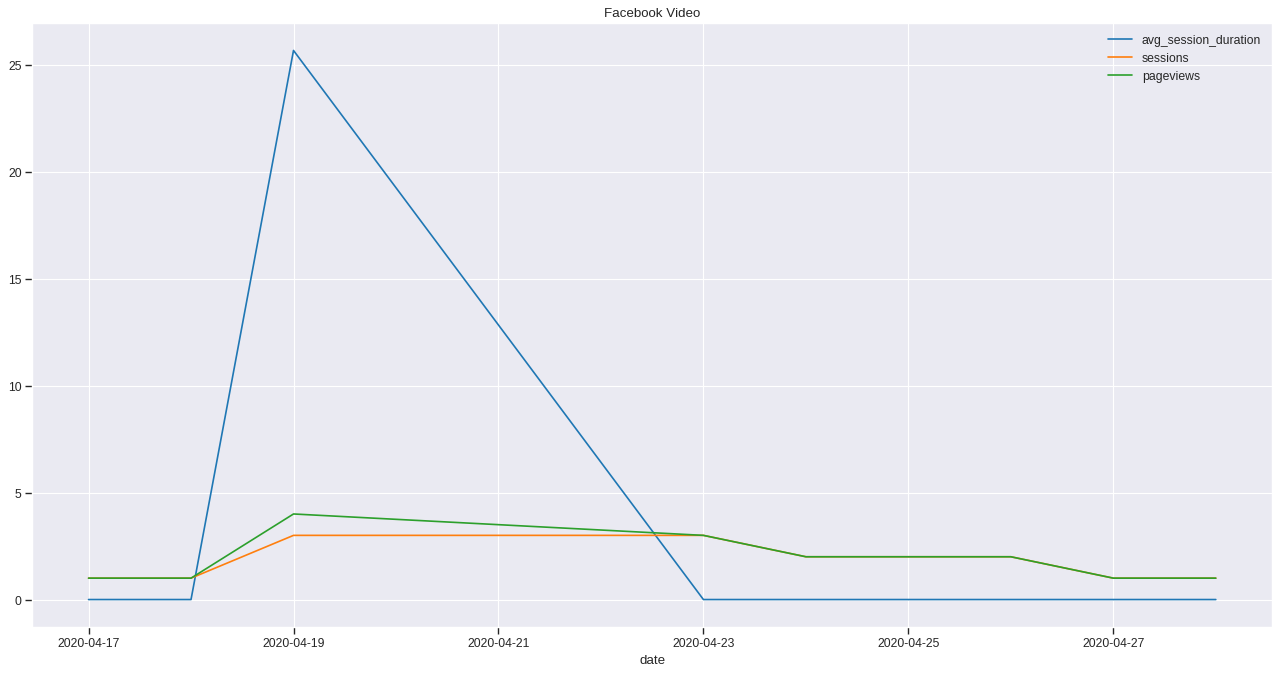

In [18]:
df_facebook_video.drop(columns=['day_in_year']).plot(x='date', title='Facebook Video', legend=1)

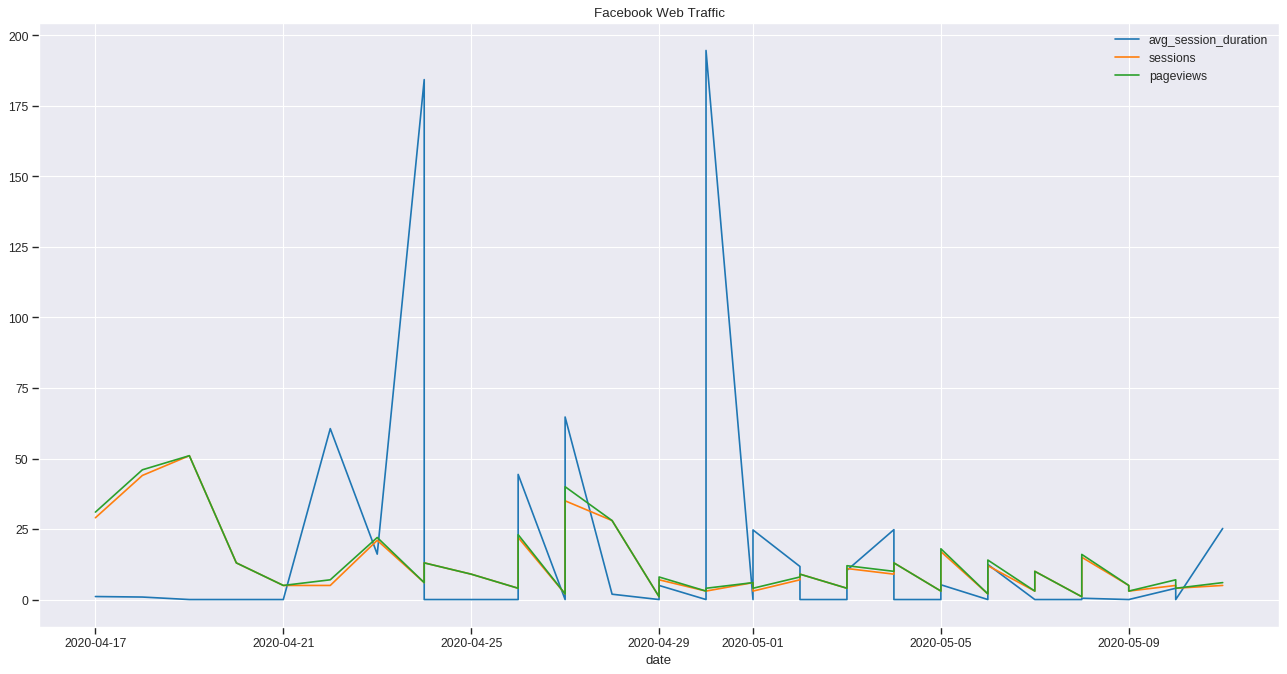

In [19]:
df_facebook_post.drop(columns=['day_in_year']).plot(x='date', title='Facebook Web Traffic', legend=1)

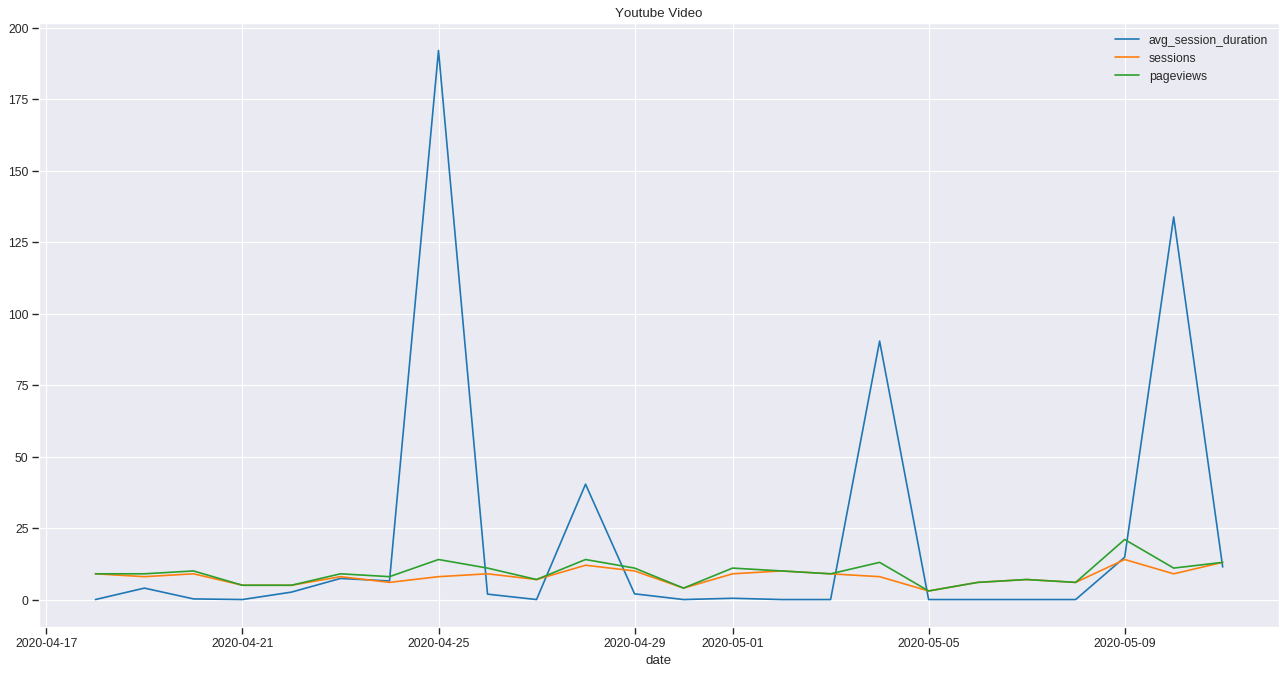

In [20]:
df_google.drop(columns=['day_in_year']).plot(x='date', title='Youtube Video', legend=1)

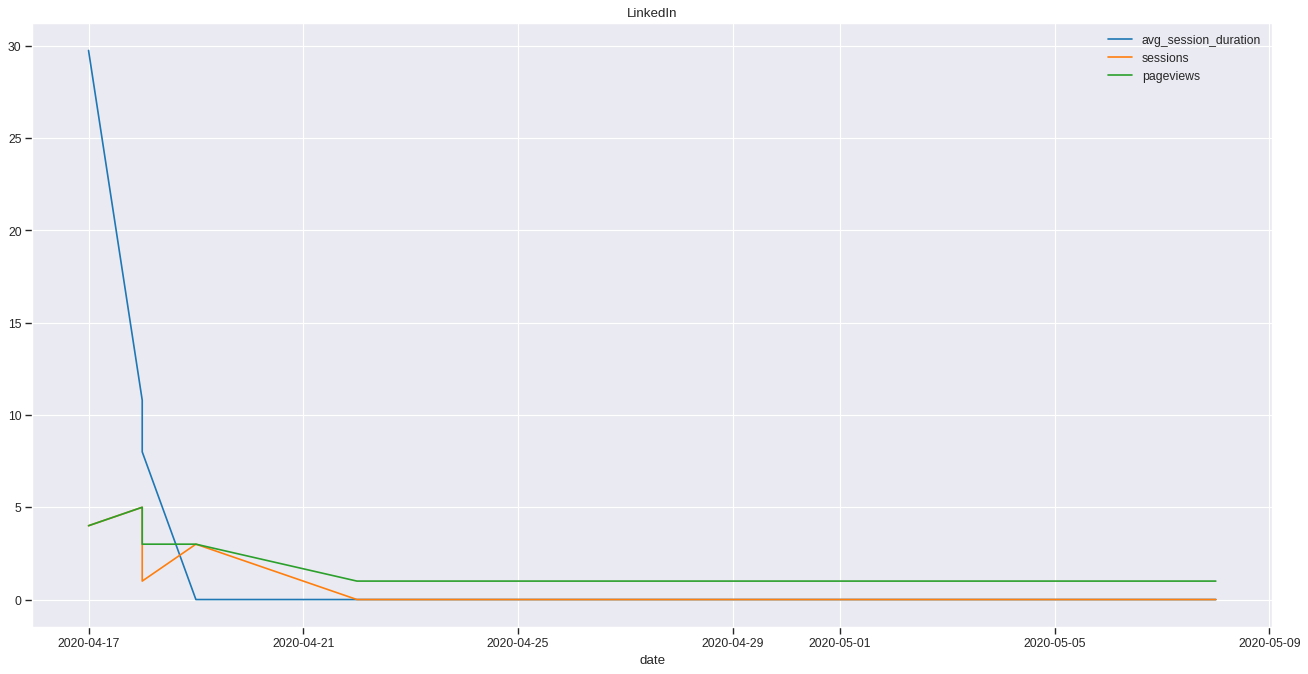

In [21]:
df_linkedin.drop(columns=['day_in_year']).plot(x='date', title='LinkedIn', legend=1)

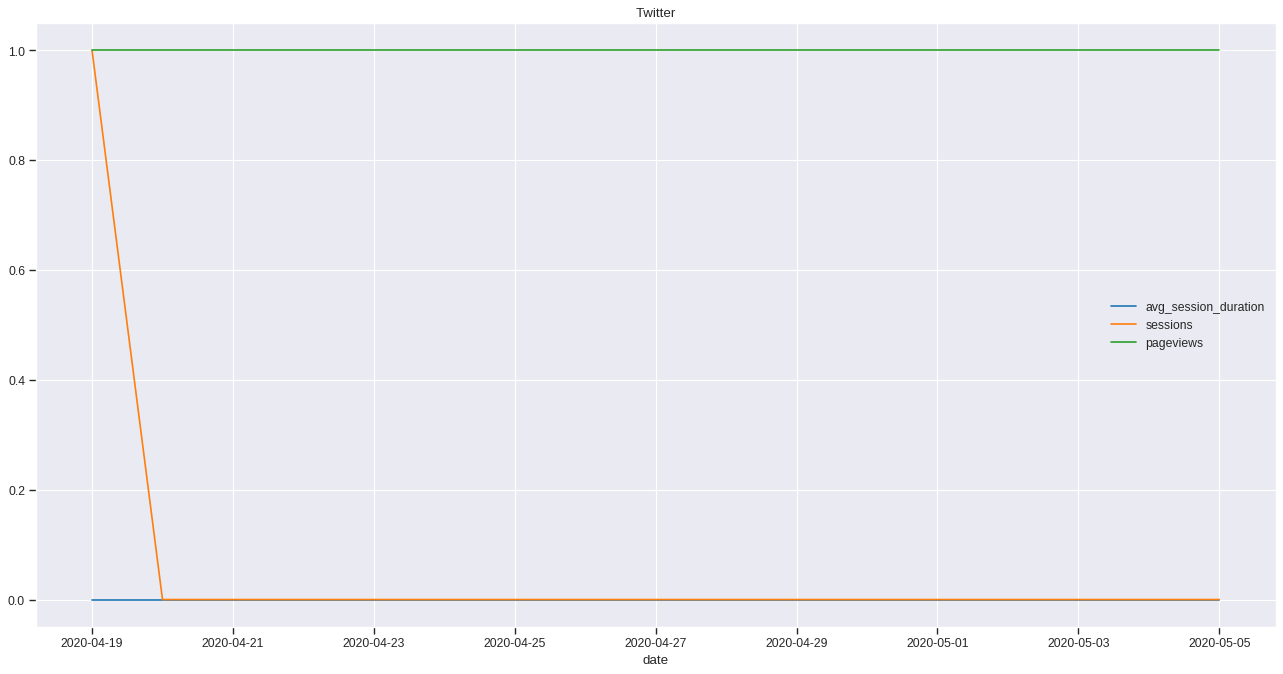

In [22]:
df_twitter.drop(columns=['day_in_year']).plot(x='date', title='Twitter', legend=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f521bfffbd0>,
      dtype=object)

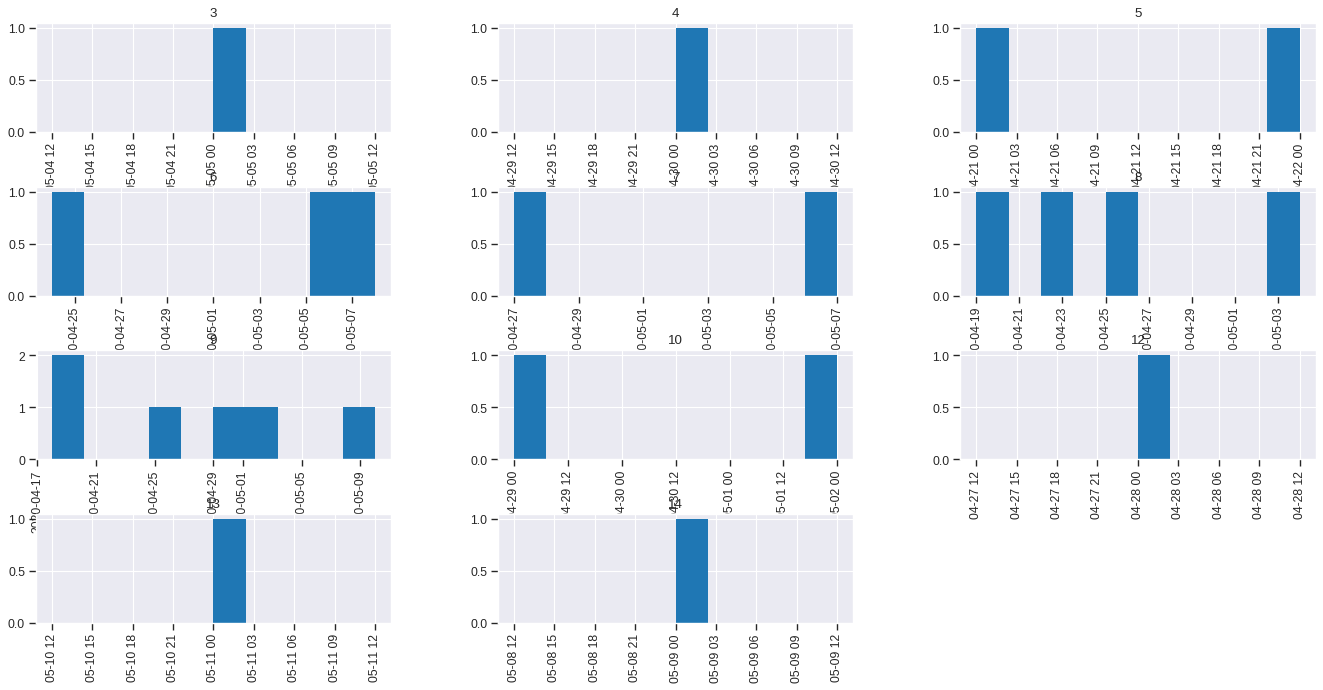

In [23]:
df_google.hist('date', by='sessions')

## Interactive graphics

In [24]:
@interact
def filter_sources(source=['cosmo / cosmo', 'facebook.com / referral', 'google / organic',
       'hk.linkedin.com / referral', '(direct) / (none)',
       'l.facebook.com / referral', 'youtube.com / referral',
       'lm.facebook.com / referral', 'linkedin.com / referral',
       'bing / organic', 't.co / referral', 'commentag.com / referral',
       'fb / image_broad', 'hexometer.com / referral',
       'm.facebook.com / referral', 'fb / image_broad_landing',
       'alenn.ai / referral', 'duckduckgo / organic',
       'fb / analytics_analysis', 'fb / post', 'google / cpc',
       'github.com / referral', 'facebook / paid_traffic',
       'fb / single_image', 'ad-review-tool.twitter.biz / referral',
       'fb / video', 'lnkd.in / referral', 's3.amazonaws.com / referral']):
    df[df['ga:sourceMedium'] == source].drop(columns=['day_in_year']).plot(x='date', title='Facebook Video', legend=1)

interactive(children=(Dropdown(description='source', options=('cosmo / cosmo', 'facebook.com / referral', 'goo…

## Correlation

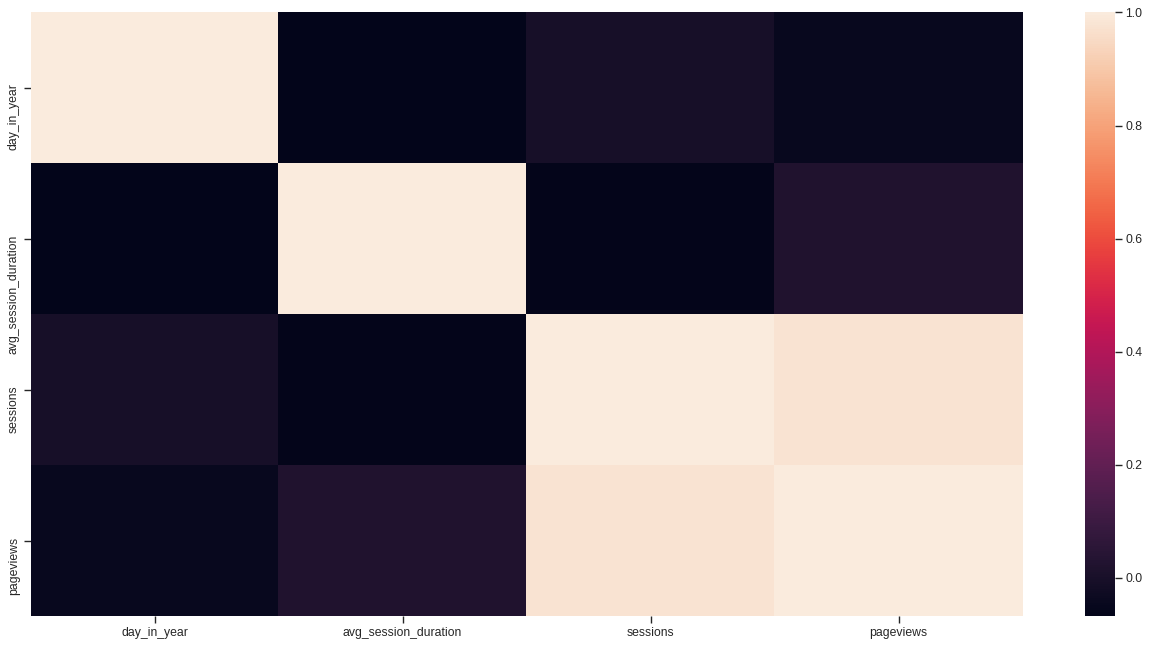

In [25]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Checking what brings in the most value

* https://docs.pymc.io/notebooks/BEST.html

In [26]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [27]:
y = df['avg_session_duration'].values

y1 = df_facebook_post['avg_session_duration'].values
y2 = df_linkedin['avg_session_duration'].values

In [28]:
μ_m = y.mean()
μ_s = y.std() * 2

with pm.Model() as model:
    facebook_mean = pm.Normal('facebook_mean', mu=μ_m, sd=μ_s)
    linkedin_mean = pm.Normal('linkedin_mean', mu=μ_m, sd=μ_s)

In [29]:
σ_low = 25
σ_high = 100

with model:
    facebook_std = pm.Uniform('facebook_std', lower=σ_low, upper=σ_high)
    linkedin_std = pm.Uniform('linkedin_std', lower=σ_low, upper=σ_high)

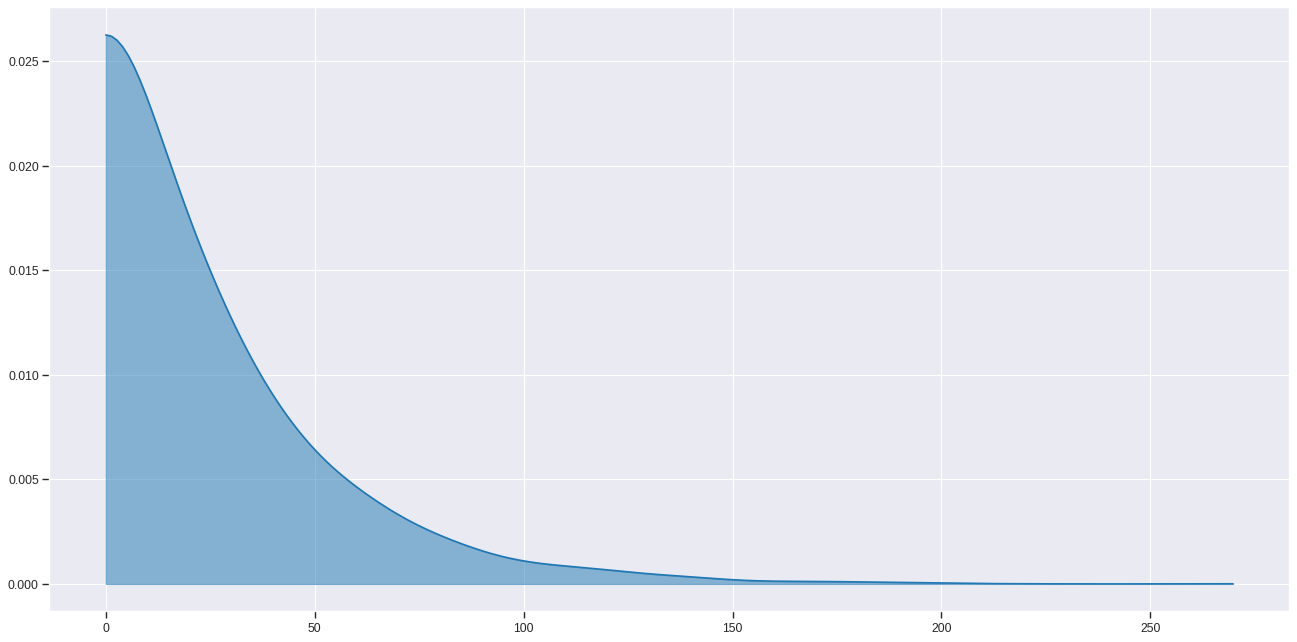

In [30]:
with model:
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={'alpha': 0.5});

In [31]:
with model:
    λ1 = facebook_std**-2
    λ2 = linkedin_std**-2

    group1 = pm.StudentT('facebook', nu=ν, mu=facebook_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT('linkedin', nu=ν, mu=linkedin_mean, lam=λ2, observed=y2)

In [32]:
with model:
    diff_of_means = pm.Deterministic('difference of means', facebook_mean - linkedin_mean)
    diff_of_stds = pm.Deterministic('difference of stds', facebook_std - linkedin_std)
    effect_size = pm.Deterministic('effect size', diff_of_means / np.sqrt((facebook_std**2 + linkedin_std**2) / 2))


In [46]:
with model:
    #trace = pm.sample(4000)
    trace = pm.sample(4000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [ν_minus_one, linkedin_std, facebook_std, linkedin_mean, facebook_mean]
Sampling chain 0, 0 divergences: 100%|██████████| 4500/4500 [00:04<00:00, 1045.89it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


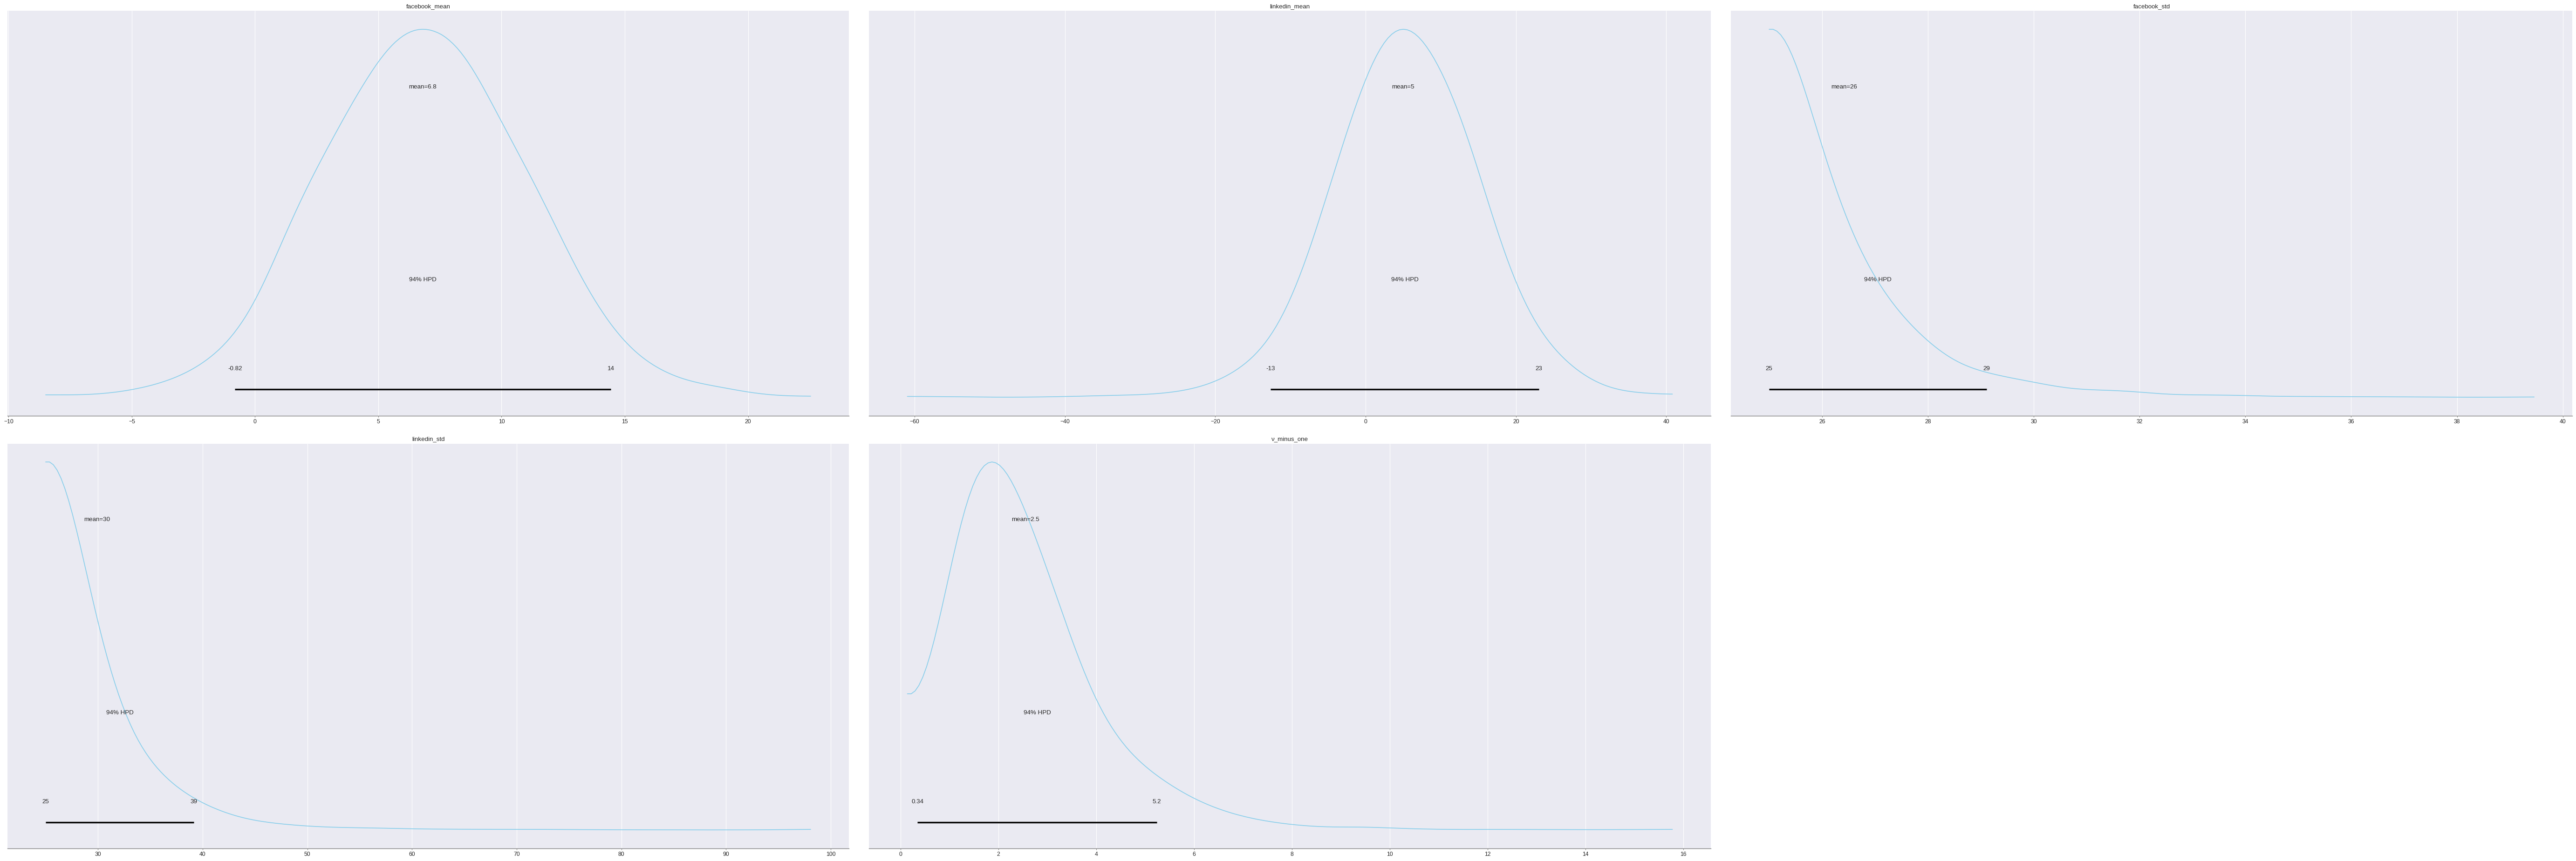

In [47]:
pm.plot_posterior(trace, var_names=['facebook_mean','linkedin_mean', 'facebook_std', 'linkedin_std', 'ν_minus_one'],
                  color='#87ceeb');

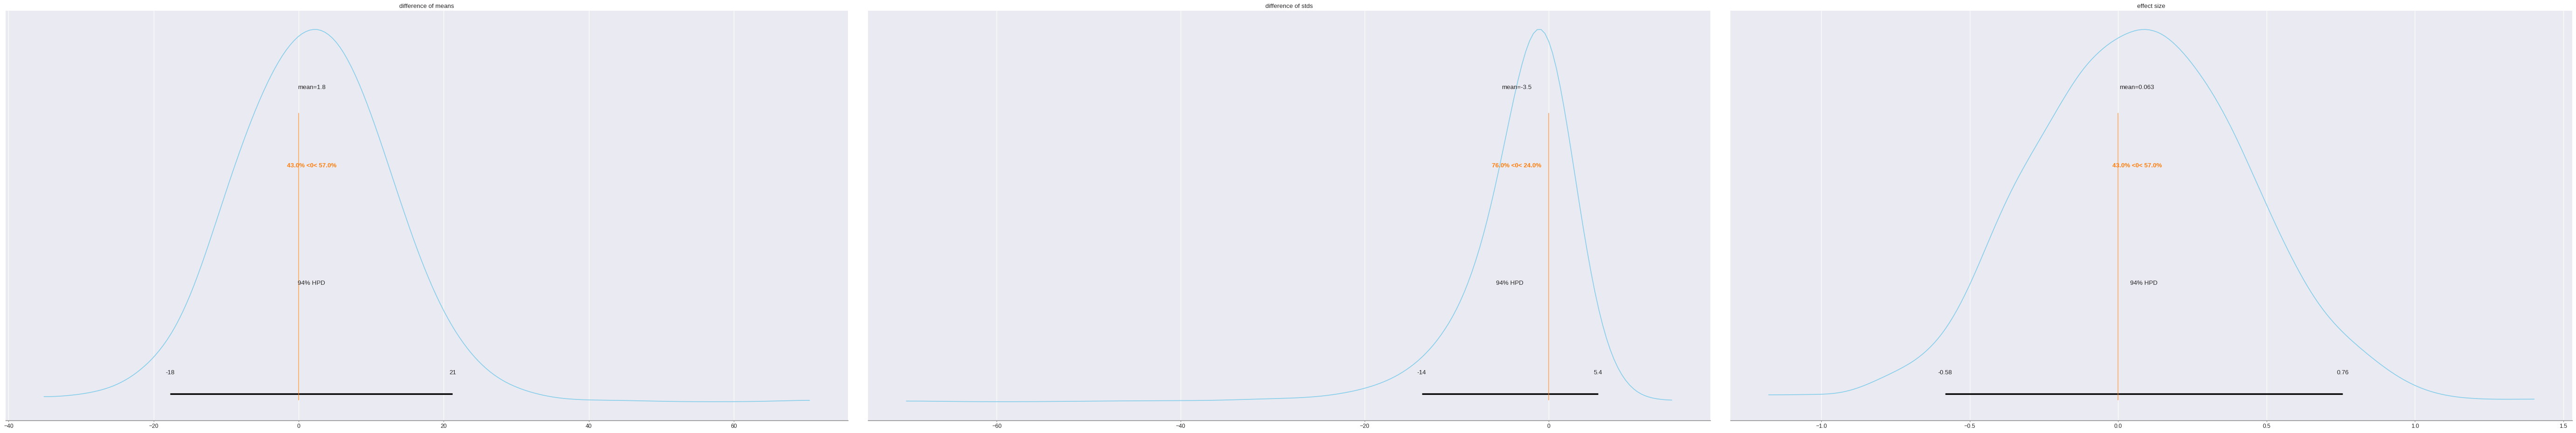

In [48]:
pm.plot_posterior(trace, var_names=['difference of means','difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb');

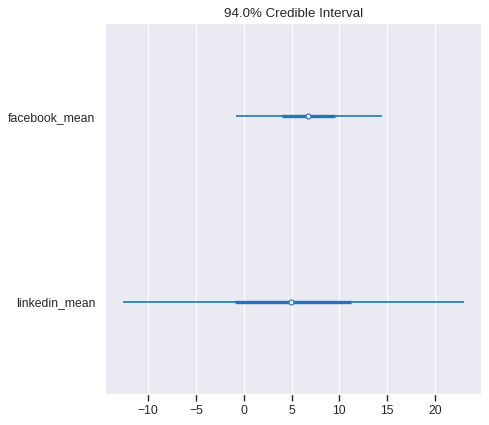

In [49]:
pm.forestplot(trace, var_names=['facebook_mean', 'linkedin_mean']);

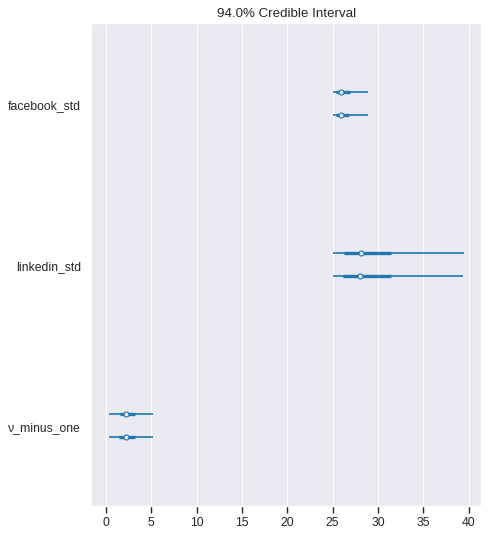

In [45]:
pm.forestplot(trace, var_names=['facebook_std',
                               'linkedin_std',
                               'ν_minus_one']);

In [38]:
pm.summary(trace, varnames=['difference of means', 'difference of stds', 'effect size'])

/home/ksaric/anaconda3/envs/google-analytics/lib/python3.7/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
difference of means,1.653,10.261,-17.591,21.183,0.090,0.086,12945.0,7120.0,13163.0,9923.0,1.0
difference of stds,-3.448,5.826,-14.265,4.582,0.049,0.037,14074.0,12314.0,14563.0,11781.0,1.0
effect size,0.060,0.358,-0.644,0.711,0.003,0.003,13808.0,7834.0,13845.0,10491.0,1.0
